In [1]:
!pip install tpot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor

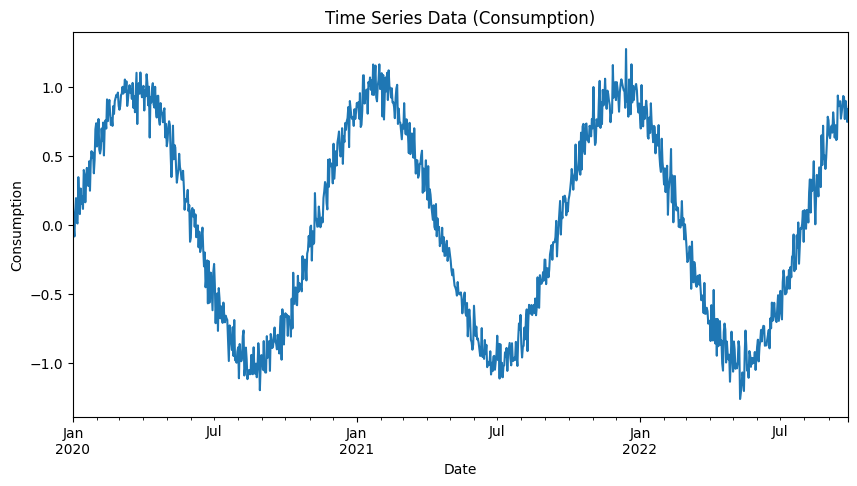

In [2]:
date_range = pd.date_range(start='1/1/2020', periods=1000, freq='D')
df = pd.DataFrame({
    'Date': date_range,
    'Consumption': np.sin(np.linspace(0, 20, 1000)) + np.random.normal(0, 0.1, 1000)
})

df.set_index('Date', inplace=True)

df['Consumption'].plot(title='Time Series Data (Consumption)', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

In [3]:
df['Lag_1'] = df['Consumption'].shift(1)
df['Lag_7'] = df['Consumption'].shift(7)
df['Lag_30'] = df['Consumption'].shift(30)

df = df.dropna()

In [4]:
target = 'Consumption'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

tpot = TPOTRegressor(verbosity=2, generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.014396196784830863

Generation 2 - Current best internal CV score: -0.014396196784830863

Generation 3 - Current best internal CV score: -0.013867999860920969

Generation 4 - Current best internal CV score: -0.013867999860920969

Generation 5 - Current best internal CV score: -0.013766534745422974

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7000000000000001, min_samples_leaf=2, min_samples_split=20, n_estimators=100)


TPOTRegressor(generations=5, population_size=20, random_state=42, verbosity=2)

In [5]:
print("\nModel Training Completed!")
print("Best model evaluation on the test set:")
print(tpot.score(X_test, y_test))

tpot.export('best_time_series_model_pipeline.py')


Model Training Completed!
Best model evaluation on the test set:
-0.01618168011343032
